In [1]:
# import numpy & pandas
import numpy as np
import pandas as pd

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv file as dataframe called df
df = pd.read_csv('911.csv')

In [3]:
# check the info() of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [4]:
# Check the head of df
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
# What are the top 5 zipcodes for 911 calls?
df['zip'].value_counts().head(5)

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

In [6]:
# what are the top 5 townships (twp) for 911 calls
df['twp'].value_counts().head(5)

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

In [7]:
# how many unique codes are there in 'title' column
print(len(df['title'].unique()))
# or 
df['title'].nunique()

148


148

In [8]:
# In the titles column there are 'Reasons/Departments' specified before the title code. These are EMS, Fire, Traffic. Use .apply()
# with custom lambda expression to create a new column called 'Reason' that contains this string value
# For example, if the title column value is 'EMS: BACK PAINS/INJURY', the Reason column value would be EMS

df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [9]:
# What is the most common Reason for a 911 call based off of this new column
df['Reason'].value_counts()

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

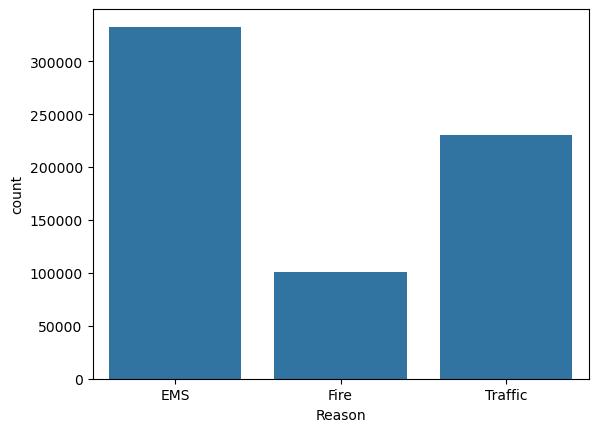

In [10]:
# now use seaborn to create a countplot of 911 calls by Reason
sns.countplot(x='Reason', data=df)

In [11]:
# now lest us begin to focus on time information. What is the data type of the objects in the timeStamp column
type(df['timeStamp'].iloc[0])

str

In [12]:
# use pdf.to_datetime to convert the timeStamp column from strings to DateTime object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
# now 'timeStamp' column has actual Timestamp entries in it, use .apply function with lambda expression to create new 3 columns of
# Hour, Month, Day of Week. 
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [14]:
# 'Day of Week' is an integer 0-6. Use map() with disctionary to map the actual string names to day of week
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


<Axes: xlabel='Day of Week', ylabel='count'>

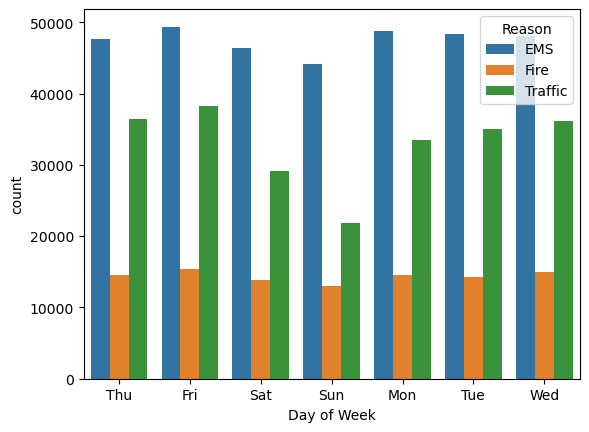

In [15]:
# Now Use Seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column
sns.countplot(x='Day of Week', data=df, hue='Reason')

<Axes: xlabel='Month', ylabel='count'>

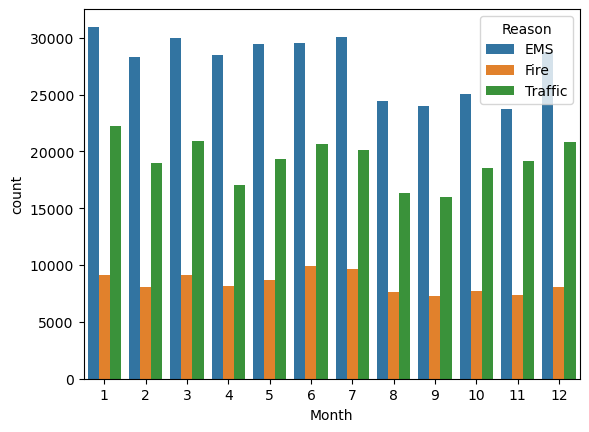

In [16]:
# now do the same for 'Month' column
sns.countplot(x='Month', data=df, hue='Reason')

In [17]:
# now create a groupby object called by Month, where you grouph the DataFrame by month column and use count() method for aggregation.

byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


<Axes: xlabel='Month'>

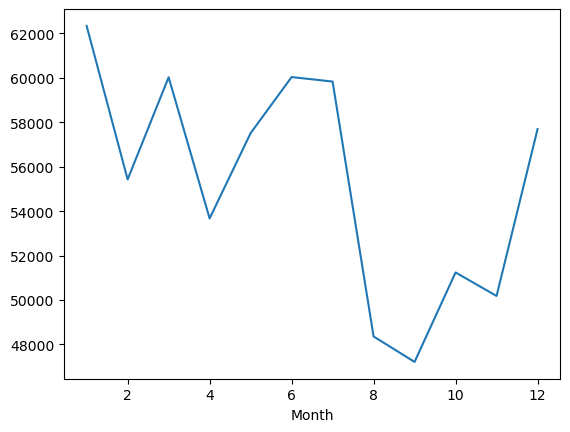

In [18]:
# Now create a simple plot off of the dataframe indicating the count of calls per month
byMonth['lat'].plot()

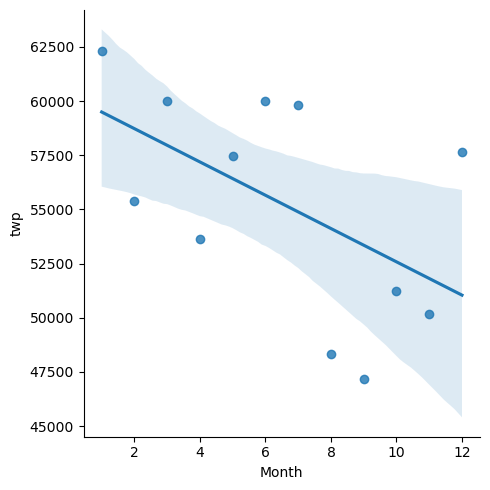

In [19]:
# now use seaborn's lmplot() to create a linear fit on the number of calls per month.
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [22]:
# Create a new column 'Date' that contains date from timeStamp column using .date() method
df['Date'] = df['timeStamp'].apply(lambda t: t.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


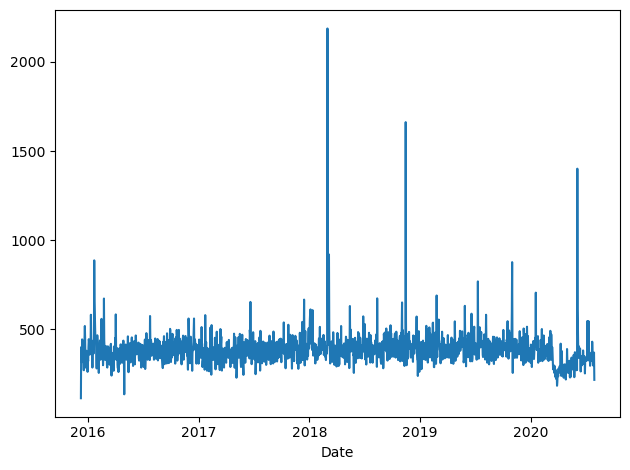

In [25]:
# Now groupby the Date column with count() aggregate and create a plot of counts of 911 calls on each Date
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

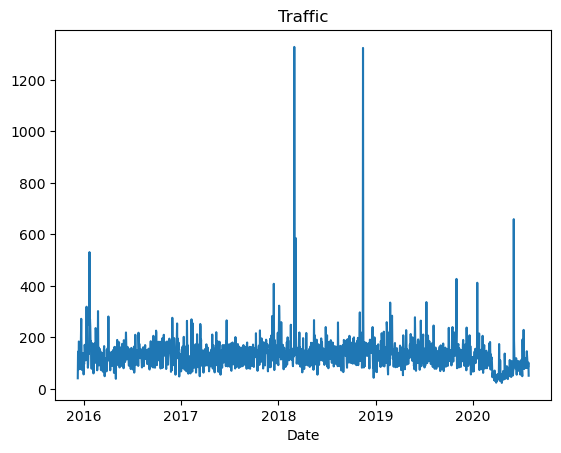

In [33]:
# Now recreate the plot but create 3 separate plots with each plot representing a Reason 'Traffic' for the 911 call
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')

In [48]:
'''
    Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns
    become the Hours and index becomes Day of Week. There are lots of ways to do this, but we will be combining data by groupby and
    unstack method.
'''
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['lat'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


<Axes: xlabel='Hour', ylabel='Day of Week'>

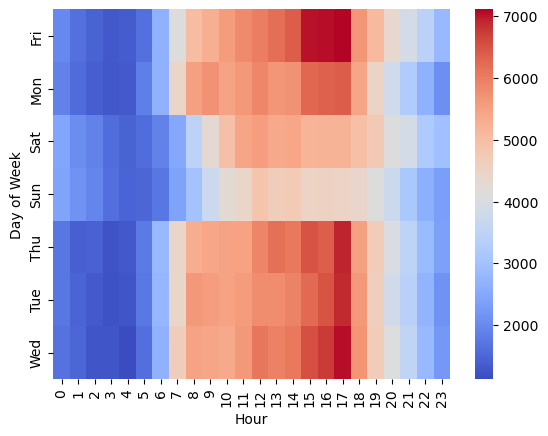

In [53]:
sns.heatmap(dayHour, cmap='coolwarm')

In [51]:
# Now repeat same plot but with months
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


<Axes: xlabel='Month', ylabel='Day of Week'>

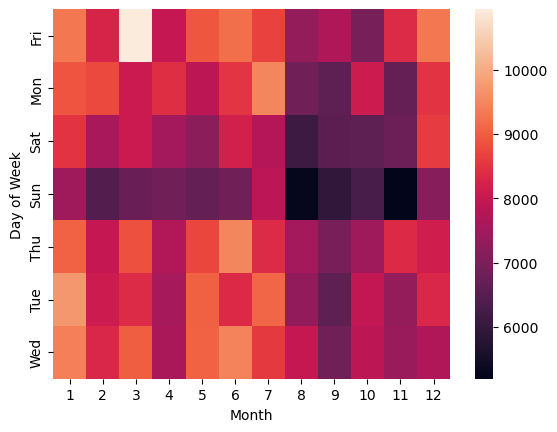

In [52]:
sns.heatmap(dayMonth)